<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png"> </src>

source: sklearn library documentation

Last time used cross_val_score
- nice helper function to take care of k fold validation
    + When creating folds keeps tries to maintain distribution of the classes 

There will be situation when you want to maintain your own cross validation

Let see KFold

In [1]:
from sklearn.model_selection import KFold
import numpy as np

In [5]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [4]:
X= np.arange(50)

In [10]:
for train_index, val_index in kfold.split(X):
    print(train_index, val_index)
    print(len(train_index), len(val_index))

[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 28 30 32 33 34 36 37 39 41 42 43 44 45 47 49] [ 2  3 27 29 31 35 38 40 46 48]
40 10
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 20 23 24 25 27 28
 29 30 31 33 34 35 37 38 40 41 43 44 45 46 47 48] [13 19 21 22 26 32 36 39 42 49]
40 10
[ 0  1  2  3  5  6  7  8  9 11 12 13 15 16 18 19 20 21 22 25 26 27 28 29
 31 32 34 35 36 37 38 39 40 42 43 44 46 47 48 49] [ 4 10 14 17 23 24 30 33 41 45]
40 10
[ 0  2  3  4  5  8  9 10 11 12 13 14 15 16 17 19 21 22 23 24 26 27 29 30
 31 32 33 35 36 37 38 39 40 41 42 43 45 46 48 49] [ 1  6  7 18 20 25 28 34 44 47]
40 10
[ 1  2  3  4  6  7 10 13 14 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 38 39 40 41 42 44 45 46 47 48 49] [ 0  5  8  9 11 12 15 16 37 43]
40 10


In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [14]:
data = load_iris()
X= data.data
y = data.target
print(X[0:4,:])
print(y[0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
[0 0 0 0]


In [16]:
lr=  LogisticRegression()

In [ ]:
lr.fit(X)

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, val_index in kfold.split(X):
    lr.fit(X[train_index], y[train_index])
    print(lr.score(X[val_index], y[val_index]))


0.8333333333333334
0.9333333333333333
0.9666666666666667
0.9666666666666667
1.0


/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be cha

Checkout this link for all the available iterators
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

# Stratified K Folds

It preserves class percentages in the folds

# Sampling and Bootstrap

Don't split training data. They sample data using different techniques

In [30]:
## ?? Can you creata a bootstrap code
        
    
    

# Hyper parameter optimization

some of the parameters of the model are not learned by the machine, called hyper-parameters. They require manual tunning.

In [52]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits 
from sklearn.model_selection import GridSearchCV

In [39]:
digit = load_digits()

In [99]:
X,y = digit.data, digit.target

In [48]:
X.shape

(1797, 64)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

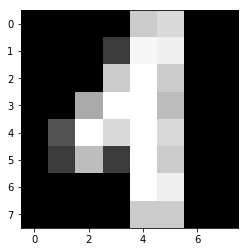

In [50]:
plt.imshow(X[200].reshape(8,8), cmap= plt.cm.Greys_r)

In [110]:
hyper_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Custom scoring functions

In [1]:
from sklearn.metrics import make_scorer